In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from matplotlib.lines import Line2D
from matplotlib.legend_handler import HandlerTuple
import matplotlib
import os
from brokenaxes import brokenaxes


In [3]:
matplotlib.rcParams.update({
    "mathtext.fontset": "stix",
    "font.family": "STIXGeneral",
    "font.size": 20,  
    "axes.titlesize": 20,
    "axes.labelsize": 20,
    "xtick.labelsize":20,
    "ytick.labelsize": 20,
    "legend.fontsize": 20,
})

Now that all the data are saved in separate folders, we can start exploring the results. Let’s take simulation 1 (for a given Vr=-8.5) and plot the outcome of the training.

Lets analyse networks with `pqif = 0, 0.5, 1`

In [4]:
names = ['LIF', 'MIX', 'QIF']
colors = ['firebrick', 'forestgreen', 'steelblue']
pqif_values = [0, 0.5, 1]
idx = 1 #simulation_{idx}

N = 200
idx = 4
itmax = 2000
itstim = 200 
nloop = 16



We trained the neural inputs, now let’s see how they evolve across the different training/testing loops.
Next, we plot the target (in red) and the neural inputs for two neurons (5 and 7), which have different romega values (5 and 1, respectively) for pqif=0 

As we can see on the previous figures, the neural input is really similar to the target.

We can quantify the similarity between the Pearson Correlation coefficent (it goes between -1 and 1, -1 indicates that the target and the input are anticorrelated, 0 that are not correlated at all adn 1 that are completely correlated)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


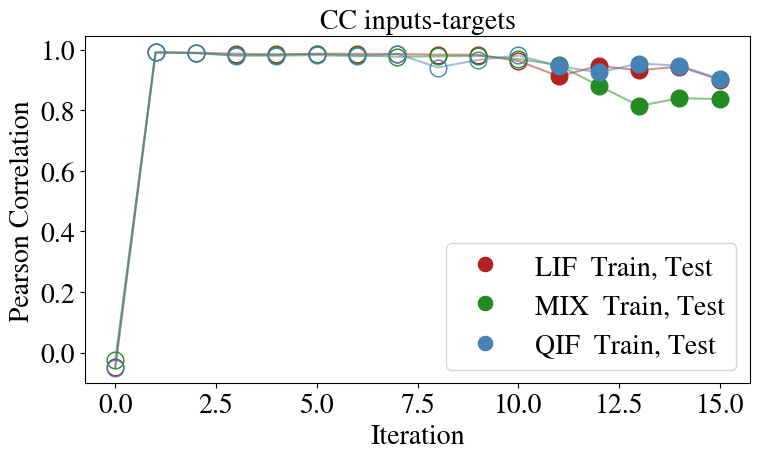

In [50]:
# Load target
idx = 9
pqif = 0



# Create figure
fig, ax = plt.subplots(figsize=(8,5))

for x, color, nombre in zip(pqif_values, colors, names):
    cc = np.zeros(nloop)
    cc_std = np.zeros(nloop)

    for iloop in range(nloop):
        file = f'simulacion_{idx}/omega_0.2/inputs/inputs_pqif_{x}_iloop_{iloop}_seed_0.csv'
        df = pd.read_csv(file, header=None).values
        ci = np.zeros(N)
        target_csv = pd.read_csv(f'simulacion_{idx}/omega_0.2/targets_pqif_{x}.csv')
        targets = target_csv.values
        for i in range(N):
            rout_i = df[:, i]
            if np.var(targets[itstim:, i]) > 0 and np.var(rout_i[itstim:]) > 0:
                ci[i] = pearsonr(targets[itstim:, i], rout_i[itstim:])[0]
        cc[iloop] = np.mean(ci)
        cc_std[iloop] = np.std(ci)

    # Plot curves and markers
    ax.plot(np.arange(nloop), cc, color=color, alpha=0.5)
    ax.plot(np.arange(1, 11), cc[1:11], 'o', markersize=12, color=color, markerfacecolor='none')
    ax.plot(np.arange(11, 16), cc[11:], 'o', markersize=12, color=color, markerfacecolor=color)
    ax.plot(0, cc[0], 'o', color=color, markersize=12, markerfacecolor='none')

# Labels and scales
ax.set_title('CC inputs-targets')

ax.set_xlabel('Iteration')
ax.set_ylabel('Pearson Correlation')

# Optional: custom legend
legend_elements = []
labels = []
for color, nombre in zip(colors, names):
    train_marker = Line2D([0], [0], marker='o', color=color, markerfacecolor='none',
                          markersize=10, linestyle='None')
    test_marker = Line2D([0], [0], marker='o', color=color, markerfacecolor=color,
                         markersize=10, linestyle='None')
    legend_elements.append((train_marker, test_marker))
    labels.append(f"{nombre}  Train, Test")

ax.legend(legend_elements, labels, handler_map={tuple: HandlerTuple()}, loc='lower right')

plt.tight_layout()
plt.savefig('CC_oscillations_idx1.eps')
plt.show()

Now we can plot the connectivity distribution after training

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


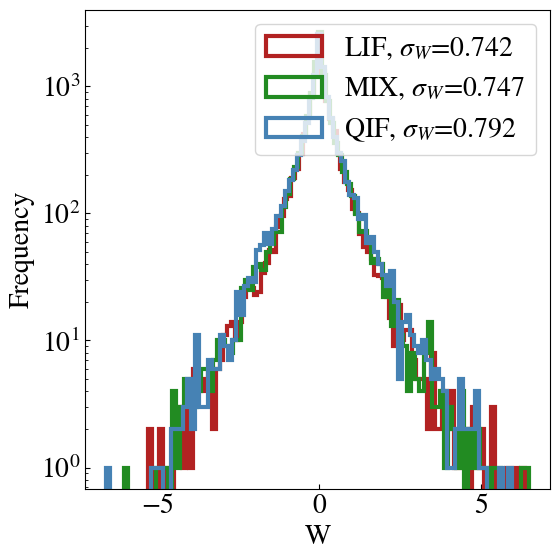

In [ ]:
base = fr"simulation_{idx}\simulation_{idx}_connectivity_matrix"

plt.figure(figsize=(6,6))

for x, color, nombre in zip(pqif_values, colors, names):

    path = fr"{base}\simulation_{idx}_pesos_pqif_{x}_matriz_iloop_11_semilla_0"
    
    matriz = np.loadtxt(path, delimiter=',')
    pesos = matriz.flatten()
    pesos = pesos[pesos != 0]
    
    sigma = np.std(pesos)
    etiqueta = rf"{nombre}, $\sigma_W$={sigma:.3f}"
    
    plt.hist(
        pesos,
        bins=100,
        histtype='step',
        linewidth=3,
        color=color,
        label=etiqueta
    )

plt.yscale('log')
plt.xlabel('W')
plt.ylabel('Frequency')
plt.legend()
plt.tick_params(axis='both', which='both', direction='in')
plt.savefig('histogramas_lqm.eps')
plt.tight_layout()
plt.show()

We can also see how the weights evolve over time

(790, 2)
7.99 0.01


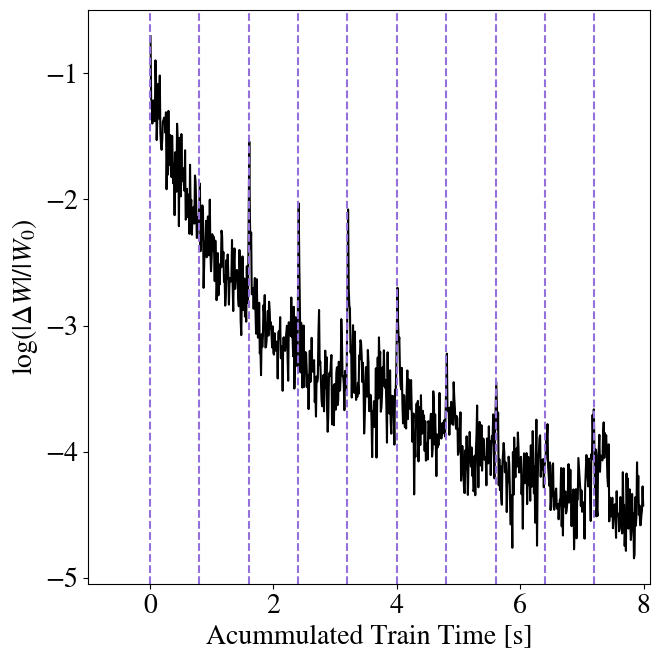

In [ ]:

dw_csv = pd.read_csv(f'simulation_{idx}/simulation_{idx}_dw_pqif_0.5_seed_0.csv')
dw_dt = dw_csv.values
print(dw_dt.shape)

plt.figure(figsize=(7,7))
plt.plot(dw_dt[:, 0]/1000, dw_dt[:, 1], color = 'black')
plt.ylabel(r'$\log (|\Delta W|/|W_0)$')
plt.xlabel('Acummulated Train Time [s]')
plt.tight_layout()
plt.savefig('dw_diff.svg')
for i in range(10):
    plt.axvline(x = i*0.8, color = 'mediumpurple',  linestyle = '--')
print(np.max(dw_dt[:, 0]/1000), np.min(dw_dt[:, 0]/1000))
plt.xlim(-1, 8.1)
plt.savefig('kc_dw_dt.eps')
plt.show()

And the eigenspectrum of the connectivity distribution

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


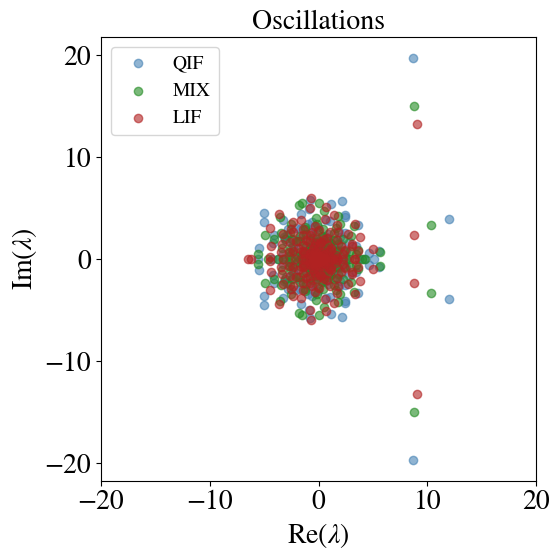

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def csv_to_matrix(filename):
    df = pd.read_csv(filename, header=None) 
    matrix = df.values 
    return matrix

pqif_vector = [1, 0.5, 0]
colores = ['steelblue', 'forestgreen', 'firebrick']
etiquetas = ['QIF', 'MIX', 'LIF']

idx = 1
plt.figure(figsize=(6, 6))

for k, pqif in enumerate(pqif_vector):
    filename = f'simulation_{idx}/simulation_{idx}_connectivity_matrix/simulation_{idx}_pesos_pqif_{pqif}_matriz_iloop_11_semilla_0'
    matrix = csv_to_matrix(filename)
    eigenval, _ = np.linalg.eig(matrix)
    ar = np.real(eigenval)
    ai = np.imag(eigenval)

    plt.scatter(ar, ai, color=colores[k], alpha=0.6, label=etiquetas[k])

plt.xlabel('Re($\\lambda$)')
plt.ylabel('Im($\\lambda$)')
plt.title('Oscillations')
plt.xlim(-20,20)

plt.legend(fontsize=14, loc='upper left')
plt.grid(False)

plt.tight_layout()
plt.savefig('espectros_unico.eps')
plt.show()




Shape de rprom: (200, 100)
Shape de cov: (200, 200)


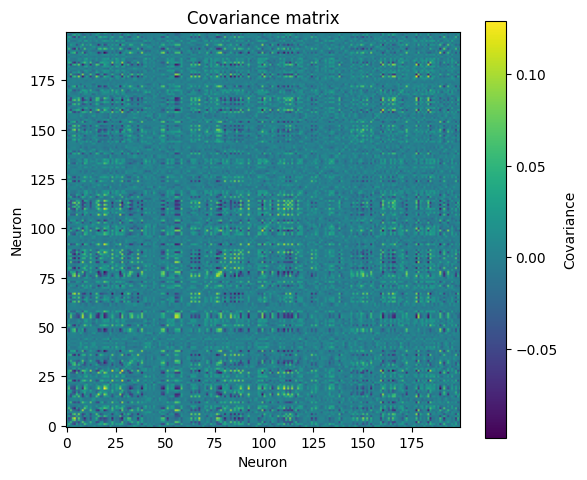

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Directorio donde guardaste los archivos
outdir = "rprom"

# Nombre del archivo que querés cargar
fname = "rprom_pqif_1_vt_None_vrest_None_seed_0.npy"   # cambia este

# Path completo
fpath = os.path.join(outdir, fname)

# ---- 1. Cargar rprom ----
rprom = np.load(fpath)
print("Shape de rprom:", rprom.shape)

# ---- 2. Calcular covariance matrix ----
cov = np.cov(rprom, rowvar=True, bias=False)
print("Shape de cov:", cov.shape)

# ---- 3. Graficar ----
plt.figure(figsize=(6, 5))
plt.imshow(cov, origin='lower')
plt.colorbar(label="Covariance")
plt.title("Covariance matrix")
plt.xlabel("Neuron")
plt.ylabel("Neuron")
plt.tight_layout()
plt.show()


In [8]:
# caculo D_PR con bias
def dpr_bias(ccorr, N, nloop):
    a = np.extract(np.identity(N), ccorr)
    c = np.extract(1-np.identity(N), ccorr)
    am2 = np.mean(a)**2
    astd2 = np.var(a)*N/(N-1)
    cm2 = np.mean(c)**2
    cstd2 = np.var(c)*N*(N-1)/(N*(N-1)-2)

    astd_bias2 = astd2*(nloop-1)/(nloop+1) - 2*(am2-cm2) / \
        (nloop-1) + 2*cstd2/(nloop+1)
    cstd_bias2 = (nloop-1)*cstd2/nloop - (am2-cm2)/nloop - \
        4*(cm2-np.sqrt(am2*cm2))/(nloop*(N+1))

    dpr_bias = N/(1+(astd_bias2/am2)+(N-1)*((cstd_bias2/am2)+(cm2/am2)))

    return dpr_bias, am2, cm2, astd2, cstd2

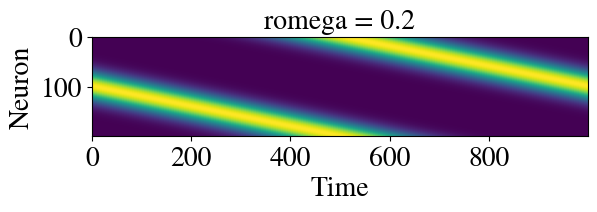

In [43]:
target_path = 'simulacion_8/omega_0.2/targets_pqif_0.csv'
target_csv = pd.read_csv(target_path)
targets = target_csv.values
plt.imshow(targets.T, origin='lower')
plt.xlabel('Time')
plt.ylabel('Neuron')
plt.title('romega = 0.2')
plt.gca().invert_yaxis()


Archivos en rprom\simulacion_9 :

['rprom_omega_0.2_pqif_0.25_vt_0_vrest_-12.3_seed_0.npy', 'rprom_omega_0.2_pqif_0.5_vt_0_vrest_-12.3_seed_0.npy', 'rprom_omega_0.2_pqif_0.75_vt_0_vrest_-12.3_seed_0.npy', 'rprom_omega_0.2_pqif_0_vt_0_vrest_-12.3_seed_0.npy', 'rprom_omega_0.2_pqif_1_vt_None_vrest_None_seed_0.npy', 'rprom_omega_0.5_pqif_0.25_vt_0_vrest_-12.3_seed_0.npy', 'rprom_omega_0.5_pqif_0.5_vt_0_vrest_-12.3_seed_0.npy', 'rprom_omega_0.5_pqif_0.75_vt_0_vrest_-12.3_seed_0.npy', 'rprom_omega_0.5_pqif_0_vt_0_vrest_-12.3_seed_0.npy', 'rprom_omega_0.5_pqif_1_vt_None_vrest_None_seed_0.npy', 'rprom_omega_1_pqif_0.25_vt_0_vrest_-12.3_seed_0.npy', 'rprom_omega_1_pqif_0.5_vt_0_vrest_-12.3_seed_0.npy', 'rprom_omega_1_pqif_0.75_vt_0_vrest_-12.3_seed_0.npy', 'rprom_omega_1_pqif_0_vt_0_vrest_-12.3_seed_0.npy', 'rprom_omega_1_pqif_1_vt_None_vrest_None_seed_0.npy']


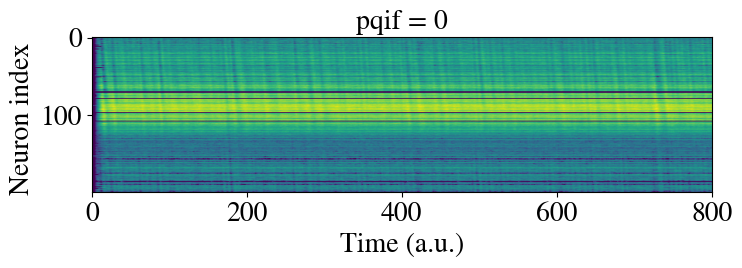

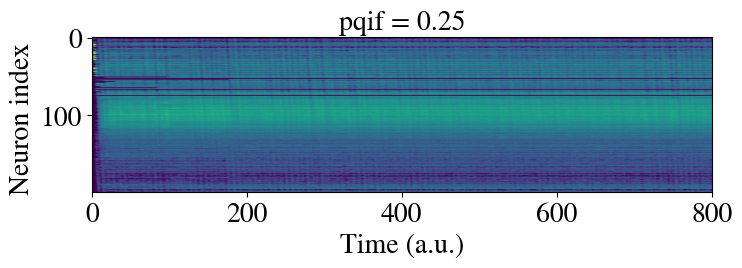

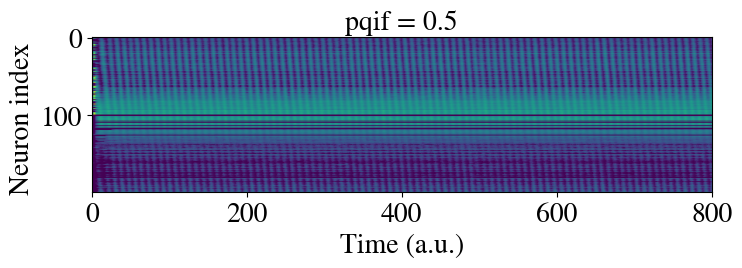

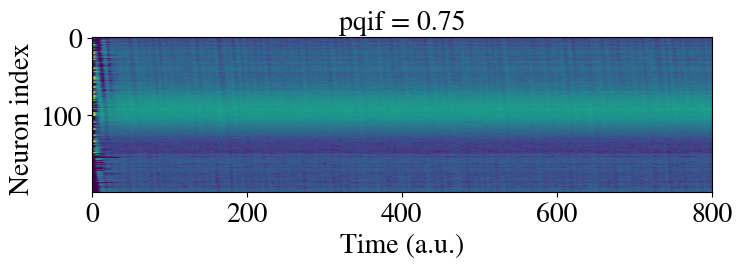

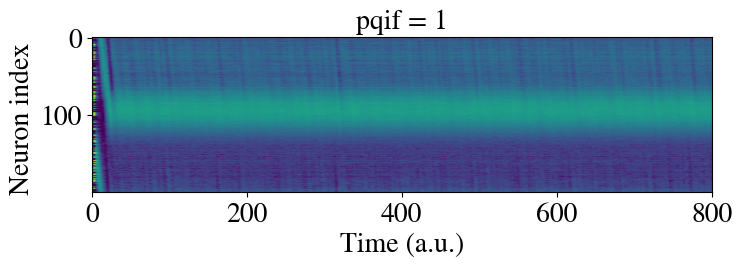

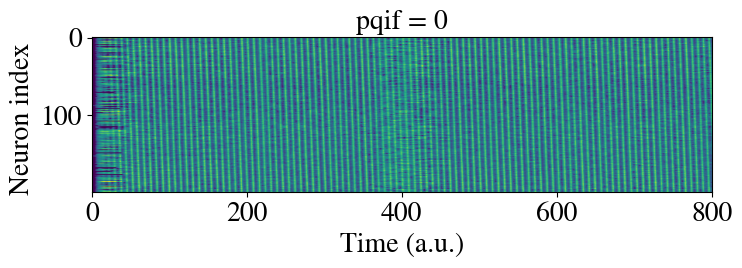

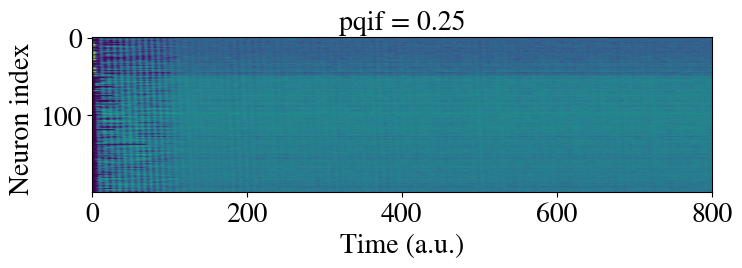

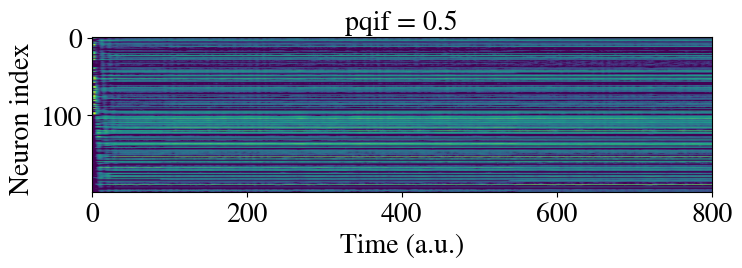

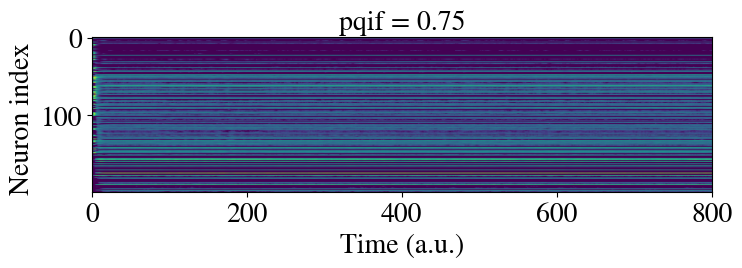

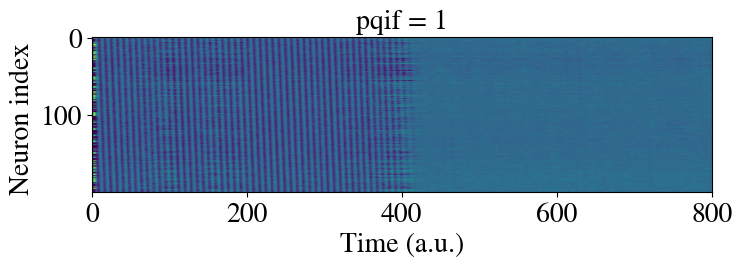

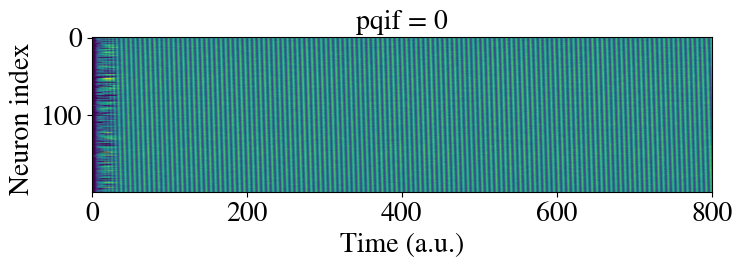

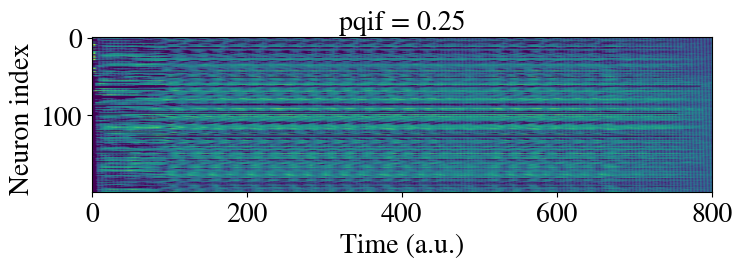

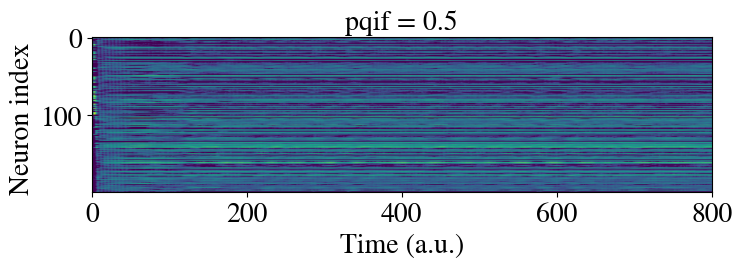

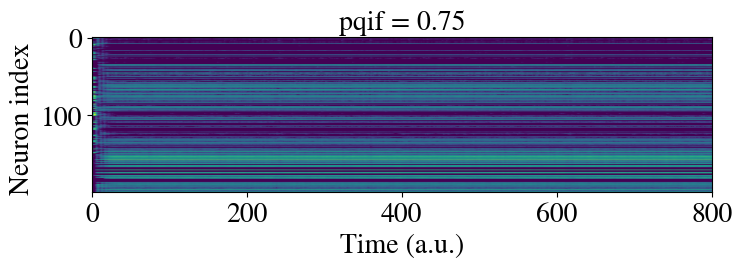

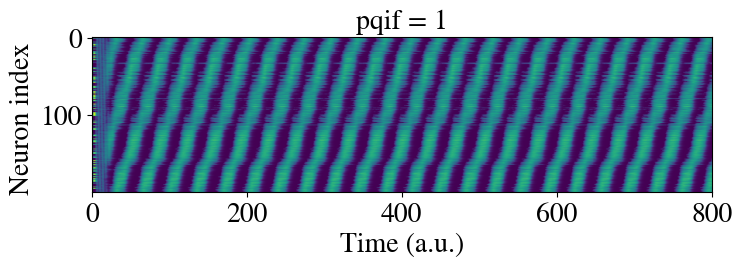

In [47]:
# Directorio donde guardaste los archivos
idx = 9
omegagauss = 0.2
outdir = os.path.join("rprom", f"simulacion_{idx}")
print("Archivos en", outdir, ":\n")
print(os.listdir(outdir))

for omegagauss in [0.2, 0.5, 1]:
    for pqif in [0, 0.25, 0.5, 0.75, 1]:
    # Nombre del archivo que querés cargar
        plt.figure(figsize=(8,100))
        if pqif ==1:
            fname = f"rprom_omega_{omegagauss}_pqif_{pqif}_vt_None_vrest_None_seed_0.npy"   # cambia este
        else:
            fname = f"rprom_omega_{omegagauss}_pqif_{pqif}_vt_0_vrest_-12.3_seed_0.npy"   # cambia este


        rprom = np.load(os.path.join(outdir, fname))
        target = pd.read_csv(f'simulacion_{idx}/omega_{omegagauss}/targets_pqif_{pqif}.csv').values
        # plt.imshow(target.T)
        # plt.title(f'Target')
        # plt.xlabel('Time (a.u.)')
        # plt.ylabel('Neuron index ')
        # plt.show()
        plt.xlim(0, 800)
        plt.title('pqif = ' + str(pqif))
        plt.imshow(rprom)
        plt.xlabel('Time (a.u.)')
        plt.ylabel('Neuron index ')

        plt.show()


In [48]:
# Directorio donde guardaste los archivos
outdir = "rprom"

for pqif in [0, 0.25, 0.75, 1]:
# Nombre del archivo que querés cargar
    if pqif ==1:
        fname = f"rprom_pqif_{pqif}_vt_None_vrest_None_seed_0.npy"   # cambia este
    else:
        fname = f"rprom_pqif_{pqif}_vt_0_vrest_-22_seed_0.npy"   # cambia este


    fpath = os.path.join(outdir, fname)

    # ---- 1. Cargar rprom ----
    rprom = np.load(fpath)
    print("Shape de rprom:", rprom.shape)
    
    # ---- 2. Calcular covariance matrix ----
    cov = np.cov(rprom, rowvar=True, bias=False)
    print("Shape de cov:", cov.shape)

    # # ---- 3. Graficar ----
    # plt.figure(figsize=(6, 5))
    # plt.imshow(cov, origin='lower')
    # plt.colorbar(label="Covariance")
    # plt.title("Covariance matrix")
    # plt.xlabel("Neuron")
    # plt.ylabel("Neuron")
    # plt.tight_layout()
    # plt.show()

    DPR = dpr_bias(cov, N=200, nloop=rprom.shape[1])[0]
    plt.plot(pqif, DPR, 'o', color='black')


FileNotFoundError: [Errno 2] No such file or directory: 'rprom\\rprom_pqif_0_vt_0_vrest_-22_seed_0.npy'